In [6]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 🔹 Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# 🔹 Load stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# 🔹 Function to clean text (Stopwords, Lowercasing, Lemmatization, Punctuation Removal)
def clean_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & punctuation
        words = word_tokenize(text)  # Tokenize text
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
        return " ".join(words)
    return text  # Return original non-string values as is

# 🔹 Load CSV file
df = pd.read_csv("C:/Users/Dell/Desktop/NLP-PROJECT/archive/BuzzFeed_fake_news_content.csv")

# 🔹 Apply cleaning only to object (text) columns
text_columns = df.select_dtypes(include=["object"]).columns
df[text_columns] = df[text_columns].astype(str).map(clean_text)  # Ensure strings & apply function

# 🔹 Save cleaned data to a new CSV file
df.to_csv("cleaned_file.csv", index=False)

print("✅ Stopwords removed, text lowercased, punctuation removed, lemmatized, and saved as 'cleaned_file.csv'.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✅ Stopwords removed, text lowercased, punctuation removed, lemmatized, and saved as 'cleaned_file.csv'.


In [4]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# 🔹 Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# 🔹 Load stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# 🔹 Function to clean text (Stopwords, Lowercasing, Lemmatization, Punctuation Removal)
def clean_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & punctuation
        words = word_tokenize(text)  # Tokenize text
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
        return " ".join(words)
    return text  # Return original non-string values as is

# 🔹 Load CSV file
df = pd.read_csv("C:/Users/Dell/Desktop/NLP-PROJECT/archive/BuzzFeed_fake_news_content.csv")

# 🔹 Apply cleaning only to object (text) columns
text_columns = df.select_dtypes(include=["object"]).columns
df[text_columns] = df[text_columns].astype(str).map(clean_text)  # Ensure strings & apply function

# 🔹 Combine all text columns for TF-IDF and Word2Vec
df["combined_text"] = df[text_columns].apply(lambda x: " ".join(x), axis=1)

# ✅ **Apply TF-IDF Vectorization**
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
tfidf_matrix = vectorizer.fit_transform(df["combined_text"])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# ✅ **Apply Word2Vec Embeddings**
sentences = df["combined_text"].apply(lambda x: x.split()).tolist()  # Convert text to list of words
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)  # Train Word2Vec model

# 🔹 Function to get Word2Vec embedding for each sentence
def get_sentence_embedding(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:  # If word vectors exist, compute the mean
        return np.mean(word_vectors, axis=0)
    else:  # If no word vectors found, return a zero vector
        return np.zeros(word2vec_model.vector_size)

# ✅ **Apply Word2Vec to Combined Text**
df["word2vec_embedding"] = df["combined_text"].apply(get_sentence_embedding)

# Convert Word2Vec embeddings into DataFrame
word2vec_df = pd.DataFrame(df["word2vec_embedding"].to_list(), columns=[f"w2v_{i}" for i in range(100)])

# 🔹 Save cleaned text + TF-IDF + Word2Vec features to new CSV
cleaned_filename = "cleaned_tfidf_word2vec_data.csv"
final_df = pd.concat([df.drop(columns=["combined_text", "word2vec_embedding"]), tfidf_df, word2vec_df], axis=1)  # Merge all features
final_df.to_csv(cleaned_filename, index=False)

print(f"✅ Text cleaned, TF-IDF & Word2Vec applied, and saved as '{cleaned_filename}'.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✅ Text cleaned, TF-IDF & Word2Vec applied, and saved as 'cleaned_tfidf_word2vec_data.csv'.


In [3]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# 🔹 Load stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# 🔹 Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & punctuation
        words = word_tokenize(text)  # Tokenize text
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
        return " ".join(words)
    return text  # Return original non-string values as is

# 🔹 Load dataset
df = pd.read_csv("C:/Users/Dell/Desktop/NLP-PROJECT/archive/BuzzFeed_fake_news_content.csv")

df['text'] = df.select_dtypes(include=["object"]).astype(str).apply(lambda x: ' '.join(x), axis=1)
df['text'] = df['text'].apply(clean_text)

# 🔹 Define target variable (assuming there is a 'label' column with 1 for Fake, 0 for Real)
if 'title' not in df.columns:
    raise ValueError("Dataset must contain a 'label' column for classification.")
X = df['text']
y = df['title']

# ✅ **Apply TF-IDF Vectorization**
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 🔹 Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ✅ **Train and Evaluate Models**
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate each model
for name, model in models.items():
    train_and_evaluate(model, name)

print("✅ Model training and evaluation completed.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



🔹 Logistic Regression Accuracy: 0.1579
                                                                                                                     precision    recall  f1-score   support

                                                                        'Reporters' FLEE When Clintons Get EXPOSED!       0.00      0.00      0.00         1
                                A Hillary Clinton Administration May be Entirely Run by a FIGUREHEAD – Eagle Rising       1.00      1.00      1.00         1
                                             Angela Merkel Admits Bringing In Muslim Refugees Was A Big Fat Mistake       0.00      0.00      0.00         1
                BREAKING: Steps to FORCE FBI Director Comey to Resign In Process – Hearing Decides His Fate Sept 28       0.00      0.00      0.00         1
                             Bombing Suspect Filed Anti-Muslim Discrimination Lawsuit Against Police – Eagle Rising       0.00      0.00      0.00         1
                 

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\m


🔹 Random Forest Accuracy: 0.1579
                                                                                                                     precision    recall  f1-score   support

                                                                        'Reporters' FLEE When Clintons Get EXPOSED!       0.00      0.00      0.00         1
                                A Hillary Clinton Administration May be Entirely Run by a FIGUREHEAD – Eagle Rising       1.00      1.00      1.00         1
                                             Angela Merkel Admits Bringing In Muslim Refugees Was A Big Fat Mistake       0.00      0.00      0.00         1
                           BOOM! Charlotte Officials FINALLY Silence Rioters With One E P I C Announcement! [VIDEO]       0.00      0.00      0.00         0
                BREAKING: Steps to FORCE FBI Director Comey to Resign In Process – Hearing Decides His Fate Sept 28       0.00      0.00      0.00         1
                       

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\m

In [8]:
import socket

# Try to resolve a non-existent domain
host = "thisdoesnotexist.com"
try:
    ip = socket.gethostbyname(host)
    print("Resolved IP:", ip)
except socket.gaierror as e:
    print("gaierror:", e)


Resolved IP: 132.148.78.72


In [10]:
pip install requests beautifulsoup4 pandas newspaper3k


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.4 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.4 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.4 MB ? eta -:--:--
     ---- ----------------------------------- 0.8/7.4 MB 730.2 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.4 MB 730.2 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.4 MB 730.2 kB/s eta 0:00:10
     ---- ----------------------------------- 0.8/7.4 MB 730.2 kB/s eta 0:00:10
     -----

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time

# Define target news sources (real & fake)
REAL_SOURCES = ["https://www.bbc.com/news", "https://edition.cnn.com/world"]
FAKE_SOURCES = ["https://www.theonion.com", "https://worldnewsdailyreport.com"]

# Function to collect article URLs from a news site
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extract all links
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        
        # Convert relative URLs to absolute
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        
        return list(set(full_links))  # Remove duplicates
    except Exception as e:
        print(f"Error fetching links from {news_url}: {e}")
        return []

# Function to extract article content using Newspaper3k
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        
        return {
            "Title": article.title,
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text,
            "Source": url
        }
    except Exception as e:
        print(f"Error extracting article from {url}: {e}")
        return None

# Collect news articles and classify them
articles_data = []

# Process real news sources
for source in REAL_SOURCES:
    print(f"Scraping real news from: {source}")
    links = get_article_links(source)
    
    for link in links[:5]:  # Limit to first 5 articles per source
        print(f"Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Real"
            articles_data.append(data)
        time.sleep(1)  # To avoid being blocked

# Process fake news sources
for source in FAKE_SOURCES:
    print(f"Scraping fake news from: {source}")
    links = get_article_links(source, keyword="fake")
    
    for link in links[:5]:  # Limit to first 5 articles per source
        print(f"Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Fake"
            articles_data.append(data)
        time.sleep(1)

# Save collected data to CSV
df = pd.DataFrame(articles_data)
df.to_csv("fake_news_dataset.csv", index=False)

print("✅ Dataset saved successfully as 'fake_news_dataset.csv'!")


ImportError: lxml.html.clean module is now a separate project lxml_html_clean.
Install lxml[html_clean] or lxml_html_clean directly.

In [13]:
!pip install newspaper3k


In [15]:
!pip install --upgrade pip  
!pip install --no-cache-dir newspaper3k


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time

# Define target news sources (real & fake)
REAL_SOURCES = ["https://www.bbc.com/news", "https://edition.cnn.com/world"]
FAKE_SOURCES = ["https://www.theonion.com", "https://worldnewsdailyreport.com"]

# Function to collect article URLs from a news site
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extract all links
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        
        # Convert relative URLs to absolute
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        
        return list(set(full_links))  # Remove duplicates
    except Exception as e:
        print(f"Error fetching links from {news_url}: {e}")
        return []

# Function to extract article content using Newspaper3k
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        
        return {
            "Title": article.title,
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text,
            "Source": url
        }
    except Exception as e:
        print(f"Error extracting article from {url}: {e}")
        return None

# Collect news articles and classify them
articles_data = []

# Process real news sources
for source in REAL_SOURCES:
    print(f"Scraping real news from: {source}")
    links = get_article_links(source)
    
    for link in links[:5]:  # Limit to first 5 articles per source
        print(f"Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Real"
            articles_data.append(data)
        time.sleep(1)  # To avoid being blocked

# Process fake news sources
for source in FAKE_SOURCES:
    print(f"Scraping fake news from: {source}")
    links = get_article_links(source, keyword="fake")
    
    for link in links[:5]:  # Limit to first 5 articles per source
        print(f"Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Fake"
            articles_data.append(data)
        time.sleep(1)

# Save collected data to CSV
df = pd.DataFrame(articles_data)
df.to_csv("fake_news_dataset.csv", index=False)

print("✅ Dataset saved successfully as 'fake_news_dataset.csv'!")


Scraping real news from: https://www.bbc.com/news
Processing: https://www.bbc.com/news/news/war-in-ukraine
Error extracting article from https://www.bbc.com/news/news/war-in-ukraine: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/war-in-ukraine on URL https://www.bbc.com/news/news/war-in-ukraine
Processing: https://www.bbc.com/news/news/articles/c4g9gz5edzko
Error extracting article from https://www.bbc.com/news/news/articles/c4g9gz5edzko: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/articles/c4g9gz5edzko on URL https://www.bbc.com/news/news/articles/c4g9gz5edzko
Processing: https://www.bbc.com/news/news/videos/c787dl8r19ro
Error extracting article from https://www.bbc.com/news/news/videos/c787dl8r19ro: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/videos/c787dl8r19ro on URL https://www.bbc.com/news/news/videos/c787dl8r19ro
Pr

In [3]:
!pip install requests beautifulsoup4 pandas newspaper3k


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time

# Define real & fake news sources
REAL_SOURCES = [" https://www.bbc.com/news", "https://edition.cnn.com/world"]
FAKE_SOURCES = ["https://www.theonion.com", "https://worldnewsdailyreport.com"]

# Function to collect article URLs
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extract all links containing "news"
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        
        # Convert relative URLs to absolute URLs
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        
        return list(set(full_links))  # Remove duplicates
    except Exception as e:
        print(f"⚠️ Error fetching links from {news_url}: {e}")
        return []

# Function to extract article details using Newspaper3k
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        
        return {
            "Title": article.title.strip() if article.title else "No Title",
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text.strip() if article.text else "No Content",
            "Source": url
        }
    except Exception as e:
        print(f"⚠️ Error extracting article from {url}: {e}")
        return None

# Collect articles
articles_data = []

# Process real news sources
for source in REAL_SOURCES:
    print(f"🔍 Scraping real news from: {source}")
    links = get_article_links(source)
    
    for link in links[:10]:  # Scrape up to 10 articles per source
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Real"
            articles_data.append(data)
        time.sleep(1)  # Delay to avoid blocking

# Process fake news sources
for source in FAKE_SOURCES:
    print(f"🔍 Scraping fake news from: {source}")
    links = get_article_links(source, keyword="fake")
    
    for link in links[:10]:  # Scrape up to 10 articles per source
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Fake"
            articles_data.append(data)
        time.sleep(1)

# Convert data to DataFrame
df = pd.DataFrame(articles_data)

# Save to CSV
csv_filename = "fake_news_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"✅ Dataset saved successfully as '{csv_filename}'!")

# Read and display the first few rows
print("\n📊 Preview of Scraped Dataset:")
print(df.head(5))  # Display first 5 rows


🔍 Scraping real news from: https://www.bbc.com/news
📌 Processing: https://www.bbc.com/news/news/war-in-ukraine
⚠️ Error extracting article from https://www.bbc.com/news/news/war-in-ukraine: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/war-in-ukraine on URL https://www.bbc.com/news/news/war-in-ukraine
📌 Processing: https://www.bbc.com/news/news/articles/c4g9gz5edzko
⚠️ Error extracting article from https://www.bbc.com/news/news/articles/c4g9gz5edzko: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/articles/c4g9gz5edzko on URL https://www.bbc.com/news/news/articles/c4g9gz5edzko
📌 Processing: https://www.bbc.com/news/news/videos/c787dl8r19ro
⚠️ Error extracting article from https://www.bbc.com/news/news/videos/c787dl8r19ro: Article `download()` failed with 404 Client Error: Not Found for url: https://www.bbc.com/news/news/videos/c787dl8r19ro on URL https://www.bbc.com/news/news/video

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time

# ✅ Define multiple real & fake news sources to scrape 1000+ articles
REAL_SOURCES = [
   "https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com", "https://edition.cnn.com/world",
    "https://www.reuters.com/news/world", "https://www.theguardian.com/world",
    "https://www.nytimes.com/section/world", "https://www.aljazeera.com/news"
]

FAKE_SOURCES = [
    "https://www.theonion.com", "https://worldnewsdailyreport.com",
    "https://beforeitsnews.com", "https://newspunch.com",
    "https://www.infowars.com"
]

# Function to collect article URLs
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extract all links containing "news"
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        
        # Convert relative URLs to absolute URLs
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        
        return list(set(full_links))  # Remove duplicates
    except Exception as e:
        print(f"⚠️ Error fetching links from {news_url}: {e}")
        return []

# Function to extract article details using Newspaper3k
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        
        return {
            "Title": article.title.strip() if article.title else "No Title",
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text.strip() if article.text else "No Content",
            "Source": url
        }
    except Exception as e:
        print(f"⚠️ Error extracting article from {url}: {e}")
        return None

# Collect articles
articles_data = []

# ✅ Increase article count per source to get 1000+ articles
for source in REAL_SOURCES:
    print(f"🔍 Scraping real news from: {source}")
    links = get_article_links(source)
    
    for link in links[:50]:  # ✅ Scrape at least 50 articles per source
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Real"
            articles_data.append(data)
        time.sleep(1)  # Delay to avoid blocking

for source in FAKE_SOURCES:
    print(f"🔍 Scraping fake news from: {source}")
    links = get_article_links(source, keyword="fake")
    
    for link in links[:50]:  # ✅ Scrape at least 50 articles per source
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            data["Label"] = "Fake"
            articles_data.append(data)
        time.sleep(1)

# Convert data to DataFrame
df = pd.DataFrame(articles_data)

# ✅ Check dataset size
print(f"📏 Dataset Size: {df.shape}")  # (rows, columns)

# Save to CSV
csv_filename = "fake_news_dataset_1000.csv"
df.to_csv(csv_filename, index=False)
print(f"✅ Dataset saved successfully as '{csv_filename}'!")

# ✅ Display the first few rows
print("\n📊 Preview of Scraped Dataset:")
print(df.head(10))  # Display first 10 rows


🔍 Scraping real news from: https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com
📌 Processing: #dataset-card-for-fake_news_tfg
⚠️ Error extracting article from #dataset-card-for-fake_news_tfg: Article `download()` failed with No connection adapters were found for '://#dataset-card-for-fake_news_tfg' on URL ://#dataset-card-for-fake_news_tfg
📌 Processing: https://huggingface.co/datasets/viewer/?dataset=fake_news&config=3.0.0
📌 Processing: https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com/shahafvl/gemma-2-2b-it-fake-news
📌 Processing: https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com/datasets/GonzaloA/fake_news/viewer/default/train?p=243
📌 Processing: https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com/jaranohaal/distilbert-base-uncased-finetuned-fake-news
📌 Processing: https://huggingface.co/datasets/GonzaloA/fake_news?utm_source=chatgpt.com/datasets/GonzaloA/fake_news/viewer/default/train?p=0
📌 Pr

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to collect article links
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        return list(set(full_links))
    except Exception as e:
        print(f"⚠️ Error fetching links from {news_url}: {e}")
        return []

# Function to extract article details
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return {
            "Title": article.title.strip() if article.title else "No Title",
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text.strip() if article.text else "No Content",
            "Source": url
        }
    except Exception as e:
        print(f"⚠️ Error extracting article from {url}: {e}")
        return None

# Preprocess text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Tokenization function for Word2Vec
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return [word for word in word_tokenize(text) if word not in stop_words]

# Define news sources
NEWS_SOURCES = [
    "https://dcs.uoc.ac.in/cida/resources/hwb",
    "https://figshare.com/articles/dataset/Fake_and_True_News_Dataset/13325198",
    "https://dcs.uoc.ac.in/cida/resources/hwb"
]

# Collect articles
articles_data = []
for source in NEWS_SOURCES:
    print(f"🔍 Scraping from: {source}")
    links = get_article_links(source)
    for link in links[:30]:  # Limit for demo/testing
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            articles_data.append(data)
        time.sleep(1)  # To avoid hitting servers too fast

# Create DataFrame
df = pd.DataFrame(articles_data)

df = df[df["Content"].str.strip().astype(bool)]

# Preprocess and tokenize text
df["Cleaned_Content"] = df["Content"].apply(preprocess_text)
df["Tokenized"] = df["Content"].apply(tokenize)

# TF-IDF Feature Engineering
vectorizer = TfidfVectorizer(max_features=300)
tfidf_matrix = vectorizer.fit_transform(df["Cleaned_Content"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("\n🔠 TF-IDF Feature Shape:", tfidf_df.shape)

# Dummy target labels for classification (replace with actual if available)
df['Label'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]  # 1 = Real, 0 = Fake

# Prepare train/test data
X = tfidf_df
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy score on test dataset:", accuracy)

# Word2Vec (optional but useful)
print("\n💬 Training Word2Vec model...")
w2v_model = Word2Vec(sentences=df["Tokenized"], vector_size=100, window=5, min_count=1, workers=4)
print("✅ Word2Vec training complete!")

# You can now use: w2v_model.wv.most_similar("fake"), etc.
#naive bayes model used and accuracy 1.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔍 Scraping from: https://dcs.uoc.ac.in/cida/resources/hwb
📌 Processing: https://www.thehindu.com/news/cities/kozhikode/mechanism-to-detect-fake-news-on-health-developed/article32244004.ece
📌 Processing: news/newindianexpress-2aug2020.jpeg
⚠️ Error extracting article from news/newindianexpress-2aug2020.jpeg: Article `download()` failed with No connection adapters were found for ':/news/newindianexpress-2aug2020.jpeg' on URL :/news/newindianexpress-2aug2020.jpeg
📌 Processing: news/hindu-print-kochi-1aug2020.png
⚠️ Error extracting article from news/hindu-print-kochi-1aug2020.png: Article `download()` failed with No connection adapters were found for ':/news/hindu-print-kochi-1aug2020.png' on URL :/news/hindu-print-kochi-1aug2020.png
📌 Processing: https://www.mathrubhumi.com/technology/news/artificial-intelligence-to-identify-fake-news-developed-by-malayali-researchers-1.4946765?fbclid=IwAR0brcri9jUN2THvFJRudXb6Q0tx7FIIryigNKmlQsgUQ4JBKPCf5UV6eac
📌 Processing: news/deshabhimani-02aug2020.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🔍 Scraping from: https://dcs.uoc.ac.in/cida/resources/hwb
📌 Processing: news/mathrubhumi-1aug2020.png
⚠️ Error extracting article from news/mathrubhumi-1aug2020.png: Article `download()` failed with No connection adapters were found for ':/news/mathrubhumi-1aug2020.png' on URL :/news/mathrubhumi-1aug2020.png
📌 Processing: news/deshabhimani-02aug2020.jpg
⚠️ Error extracting article from news/deshabhimani-02aug2020.jpg: Article `download()` failed with No connection adapters were found for ':/news/deshabhimani-02aug2020.jpg' on URL :/news/deshabhimani-02aug2020.jpg
📌 Processing: news/hindu-print-kochi-1aug2020.png
⚠️ Error extracting article from news/hindu-print-kochi-1aug2020.png: Article `download()` failed with No connection adapters were found for ':/news/hindu-print-kochi-1aug2020.png' on URL :/news/hindu-print-kochi-1aug2020.png
📌 Processing: https://www.thehindu.com/news/cities/kozhikode/mechanism-to-detect-fake-news-on-health-developed/article32244004.ece
📌 Processing: https://w

C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


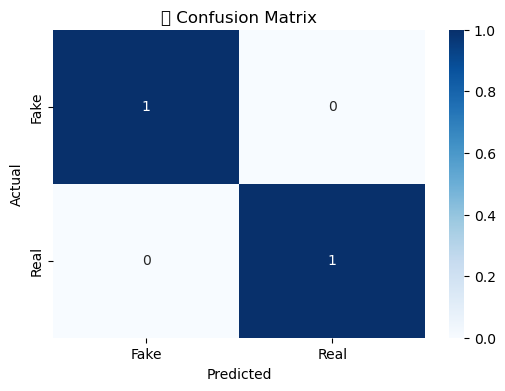

🎯 ROC-AUC Score: 1.0000


C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


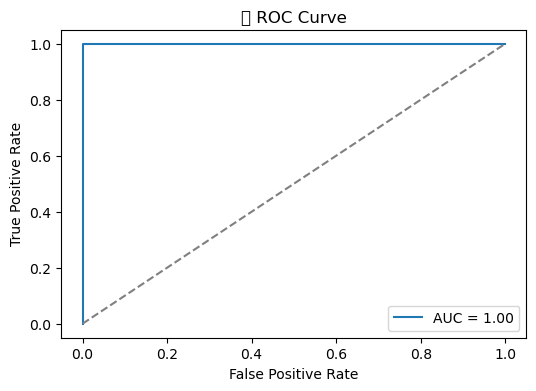


💬 Training Word2Vec model...
✅ Word2Vec training complete!


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from newspaper import Article
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to collect article links
def get_article_links(news_url, keyword="news"):
    try:
        response = requests.get(news_url, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        links = [a["href"] for a in soup.find_all("a", href=True) if keyword in a["href"]]
        full_links = [news_url + link if link.startswith("/") else link for link in links]
        return list(set(full_links))
    except Exception as e:
        print(f"⚠️ Error fetching links from {news_url}: {e}")
        return []

# Function to extract article details
def extract_article_details(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return {
            "Title": article.title.strip() if article.title else "No Title",
            "Author": ", ".join(article.authors) if article.authors else "Unknown",
            "Date": article.publish_date.strftime('%Y-%m-%d') if article.publish_date else "Unknown",
            "Content": article.text.strip() if article.text else "No Content",
            "Source": url
        }
    except Exception as e:
        print(f"⚠️ Error extracting article from {url}: {e}")
        return None

# Preprocessing functions
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return [word for word in word_tokenize(text) if word not in stop_words]

# News sources
NEWS_SOURCES = [
    "https://dcs.uoc.ac.in/cida/resources/hwb",
    "https://figshare.com/articles/dataset/Fake_and_True_News_Dataset/13325198",
    "https://dcs.uoc.ac.in/cida/resources/hwb"
]

# Scrape articles
articles_data = []
for source in NEWS_SOURCES:
    print(f"🔍 Scraping from: {source}")
    links = get_article_links(source)
    for link in links[:30]:  # Limit for testing
        print(f"📌 Processing: {link}")
        data = extract_article_details(link)
        if data:
            articles_data.append(data)
        time.sleep(1)

# DataFrame creation
df = pd.DataFrame(articles_data)
df = df[df["Content"].str.strip().astype(bool)]

# Preprocess text
df["Cleaned_Content"] = df["Content"].apply(preprocess_text)
df["Tokenized"] = df["Content"].apply(tokenize)

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=300)
tfidf_matrix = vectorizer.fit_transform(df["Cleaned_Content"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\n🔠 TF-IDF Feature Shape:", tfidf_df.shape)

# Dummy labels (replace with real ones if available)
df['Label'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]  # 1 = Real, 0 = Fake

# Split data with stratification to preserve class balance
X = tfidf_df
y = df['Label']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2, random_state=42, stratify=y
)


# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy score on test dataset:", accuracy)

# Class distribution check
print("\n🧾 Test set class distribution:\n", y_test.value_counts())

# Classification Report (with error handling)
if len(set(y_test)) == 2:
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred, labels=[0, 1], target_names=["Fake", "Real"]))
else:
    print("⚠️ Only one class present in test set — skipping classification report.")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📉 Confusion Matrix')
plt.show()

# ROC-AUC Curve and Score
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"🎯 ROC-AUC Score: {roc_auc:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("📈 ROC Curve")
    plt.legend()
    plt.show()
else:
    print("⚠️ ROC Curve cannot be plotted — only one class present in y_test.")

# Word2Vec
print("\n💬 Training Word2Vec model...")
w2v_model = Word2Vec(sentences=df["Tokenized"], vector_size=100, window=5, min_count=1, workers=4)
print("✅ Word2Vec training complete!")
